In [5]:
from sympy import *
import sympy as sp
from sympy.physics.mechanics import dynamicsymbols, mechanics_printing
mechanics_printing()
import modern_robotics as mr
import numpy as np
from Utilities.symbolicFunctions import*

### Functions & variables from former tasks

#### Variables

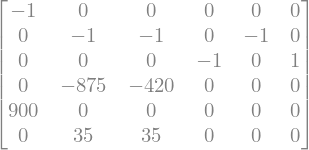

In [6]:
th1, th2, th3, th4, th5, th6 = dynamicsymbols('theta_1, theta_2, theta_3, theta_4, theta_5, theta_6')

S_bp = Matrix([[-1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [0, -875, -420, 0, 0, 0], [-900, 0, 0, 0, 0, 0], [0, -35, -35, 0, 0, 0]])
S_bp = Matrix([[-1, 0, 0, 0, 0, 0], [0, -1, -1, 0, -1, 0], [0, 0, 0, -1, 0, 1], [0, -875, -420, 0, 0, 0], [900, 0, 0, 0, 0, 0], [0, 35, 35, 0, 0, 0]])
S_bp

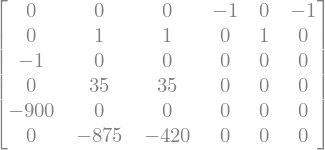

In [7]:
##___Markus____
def Jb_maker6x6(Blist): #Foreløpig for 6x6, fikset!
    Jb = sp.zeros(6,6)
    Jb[:,5] =  Blist[:,5]
    Jb[:,4] =  Ad(exp6(-Blist[:,5], th6)) * Blist[:,4]
    Jb[:,3] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5)) * Blist[:,3]
    Jb[:,2] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4)) * Blist[:,2]
    Jb[:,1] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4) * exp6(-Blist[:,2], th3)) * Blist[:,1]
    Jb[:,0] =  Ad(exp6(-Blist[:,5], th6) * exp6(-Blist[:,4], th5) * exp6(-Blist[:,3], th4) * exp6(-Blist[:,2], th3) * exp6(-Blist[:,1], th2)) * Blist[:,0]
    
    return Jb

om = sp.zeros(3, 6)
om6 = om[:, 5] = Matrix([-1,0,0])
om5 = om[:, 4] = Matrix([0,1,0])
om4 = om[:, 3] = Matrix([-1,0,0])
om3 = om[:, 2] = Matrix([0,1,0])
om2 = om[:, 1] = Matrix([0,1,0])
om1 = om[:, 0] = Matrix([0,0,-1])

q = sp.zeros(3,6)
q6 = q[:,5] = Matrix([0,0,0])
q5 = q[:,4] = Matrix([0,0,0])
q4 = q[:,3] = Matrix([0,0,0])
q3 = q[:,2] = Matrix([-420,0,-35])
q2 = q[:,1] = Matrix([-420-455,0,-35])
q1 = q[:,0] = Matrix([-420-455-25,0,-435])


Blist = Slist_maker(om,q)#Blist med B6 posisjon som {6}, orientert som {s}
Blist

In [8]:
Jb = Jb_maker6x6(Blist)

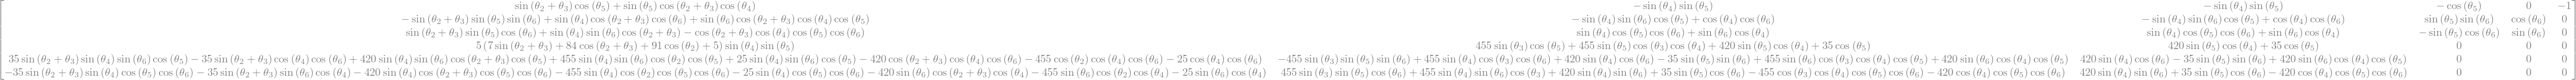

In [9]:
Jb = Jb_maker6x6(Blist)
Jb.simplify()
Jb

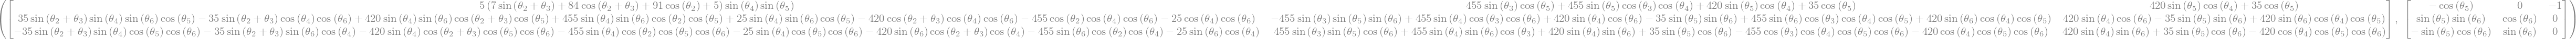

In [6]:
#Jb = [[Jb11, Jb12],
#      [Jb21, Jb22]]
Jb_arm = zeros(3,3)   # Jb21 (position)
Jb_wrist = zeros(3,3) # Jb12 (rotation)

Jb_wrist = Jb[0:3,3:6]
Jb_arm = Jb[3:6,0:3]

Jb_arm.simplify()
Jb_wrist.simplify()

Jb_arm, Jb_wrist

In [10]:
JbArm = zeros(3,3) # Arm (position)
JbWrist = zeros(3,3) # Wrist (rotation)

JbWrist = Jb[0:3,3:6]
JbArm = Jb[3:6,0:3]



### Wrist:

In [11]:
JbWrist

In [12]:
DetJbWrist = JbWrist.det()
DetJbWrist


             2                  2    
- sin(θ₄)⋅sin (θ₅) - sin(θ₄)⋅cos (θ₅)

In [10]:
solve(DetJbWrist, th4, th5)

[{θ₄: 0}, {θ₄: π}]

### Arm:

In [14]:
detArm = JbArm.det()
simplJbArm = JbArm.subs({th1:0, th4:0, th5:0, th6:0}) # Simplifying the expression to shorten calculation time
simplJbArm

⎡                                                                             
⎢                                                        0                    
⎢                                                                             
⎢-(35⋅sin(θ₂) - 420⋅cos(θ₂) + 420)⋅cos(θ₂)⋅cos(θ₃) + (420⋅sin(θ₂) + 35⋅cos(θ₂)
⎢                                                                             
⎣(-35⋅sin(θ₂) + 420⋅cos(θ₂) - 420)⋅sin(θ₃)⋅cos(θ₂) + (420⋅sin(θ₂) + 35⋅cos(θ₂)

                                                                           2  
                                      - (420⋅sin(θ₂) + 35⋅cos(θ₂) - 35)⋅sin (θ
                                                                              
 - 35)⋅sin(θ₂)⋅cos(θ₃) - 900⋅cos(θ₃)                (35⋅sin(θ₂) - 420⋅cos(θ₂) 
                                                                              
 - 35)⋅sin(θ₂)⋅sin(θ₃) - 900⋅sin(θ₃)                (-35⋅sin(θ₂) + 420⋅cos(θ₂)

                                        2         

In [15]:
detSimplJbArm = simplJbArm.det()
detSimplJbArm.simplify()


                    79704625⋅sin(2⋅θ₂)                                      
-91728000⋅sin(θ₂) - ────────────────── + 7644000⋅cos(θ₂) + 6688500⋅cos(2⋅θ₂)
                            2                                               

In [16]:
solve(detSimplJbArm, th2, th3)


⎡⎧           ⎛7    √2111⋅ⅈ⎞⎫  ⎧           ⎛7    √2111⋅ⅈ⎞⎫                     
⎢⎨θ₂: -2⋅atan⎜── - ───────⎟⎬, ⎨θ₂: -2⋅atan⎜── + ───────⎟⎬, {θ₂: -2⋅atan(12 - √
⎣⎩           ⎝12      12  ⎠⎭  ⎩           ⎝12      12  ⎠⎭                     

                               ⎤
145)}, {θ₂: -2⋅atan(12 + √145)}⎥
                               ⎦